In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


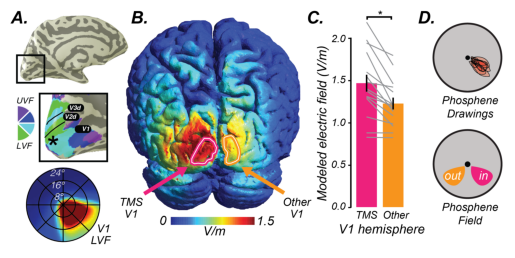

In [4]:
file_name = 'Fig1.png'
img = Image.open(file_name)
img_array = np.array(img)

# Visualize the image
plt.imshow(img)
plt.axis('off')
plt.show()

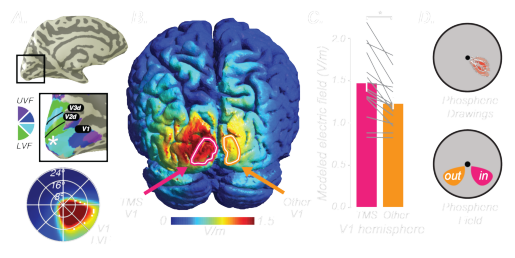

In [10]:
img_new_array = img_array.copy()
# Add an empty column for alpha values
img_new_array = np.insert(img_new_array, 3, 255, axis=2)

# Set the alpha value to 0 for the white pixels
img_new_array[img_new_array[:,:,0] == 255] = [255, 255, 255, 0]
# Change the black pixels to be white but not transparent
img_new_array[img_new_array[:,:,0] == 0] = [255, 255, 255, 255]
# Save the image
img_new = Image.fromarray(img_new_array)
img_new.save('Fig1_transparent.png')

# Visualize the new image
plt.imshow(img_new_array)
plt.axis('off')
plt.show()

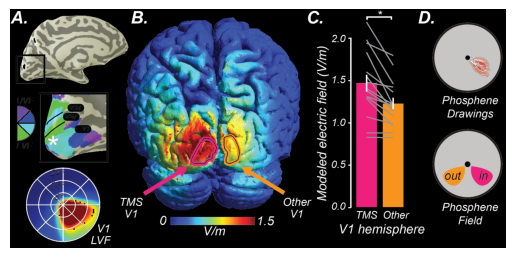

In [14]:
# Find pixels that are white
def find_white_pixels(img):
    white_pixels = np.argwhere(img == 1)
    return white_pixels
def find_black_pixels(img):
    black_pixels = np.argwhere(img == 0)
    return black_pixels

white_pixels = find_white_pixels(img)
black_pixels = find_black_pixels(img)

img_new = img.copy()
for pixel in white_pixels:
    img_new[pixel[0], pixel[1], :] = 0

for pixel in black_pixels:
    img_new[pixel[0], pixel[1], :] = 1

# Visualize the image
plt.imshow(img_new)
plt.axis('off')
plt.show()